<a href="https://colab.research.google.com/github/Jasmine-kaur8/HR_Analytics_Project/blob/main/HR_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
from google.colab import files
uploaded = files.upload()

Saving HR-Employee-Attrition.csv to HR-Employee-Attrition (2).csv


Importing the data

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#outlier removal
from numpy import percentile
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


Importing the required libraries.

In [97]:
data = pd.read_csv('HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Reading the dataset

In [98]:
data.shape

(1470, 35)

The dataset has 1471 rows and 35 columns

In [99]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


There are outliers in MonthlyIncome, TotalWorkingHours, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,	YearsWithCurrManager. There is high standard deviation in MonthlyIncome, StockOptionLevel, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,	YearsWithCurrManager

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There is some features that are object and some are numerical

In [101]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

There are 1233 people who didn't leave and there are 237 people who left the company.

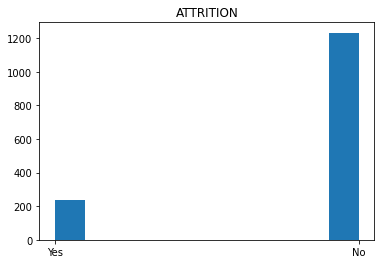

In [102]:
#HISTOGRAM

data['Attrition'].hist(grid = False)
plt.title('ATTRITION')
plt.show()


There is a problem of class imbalance

In [103]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null value

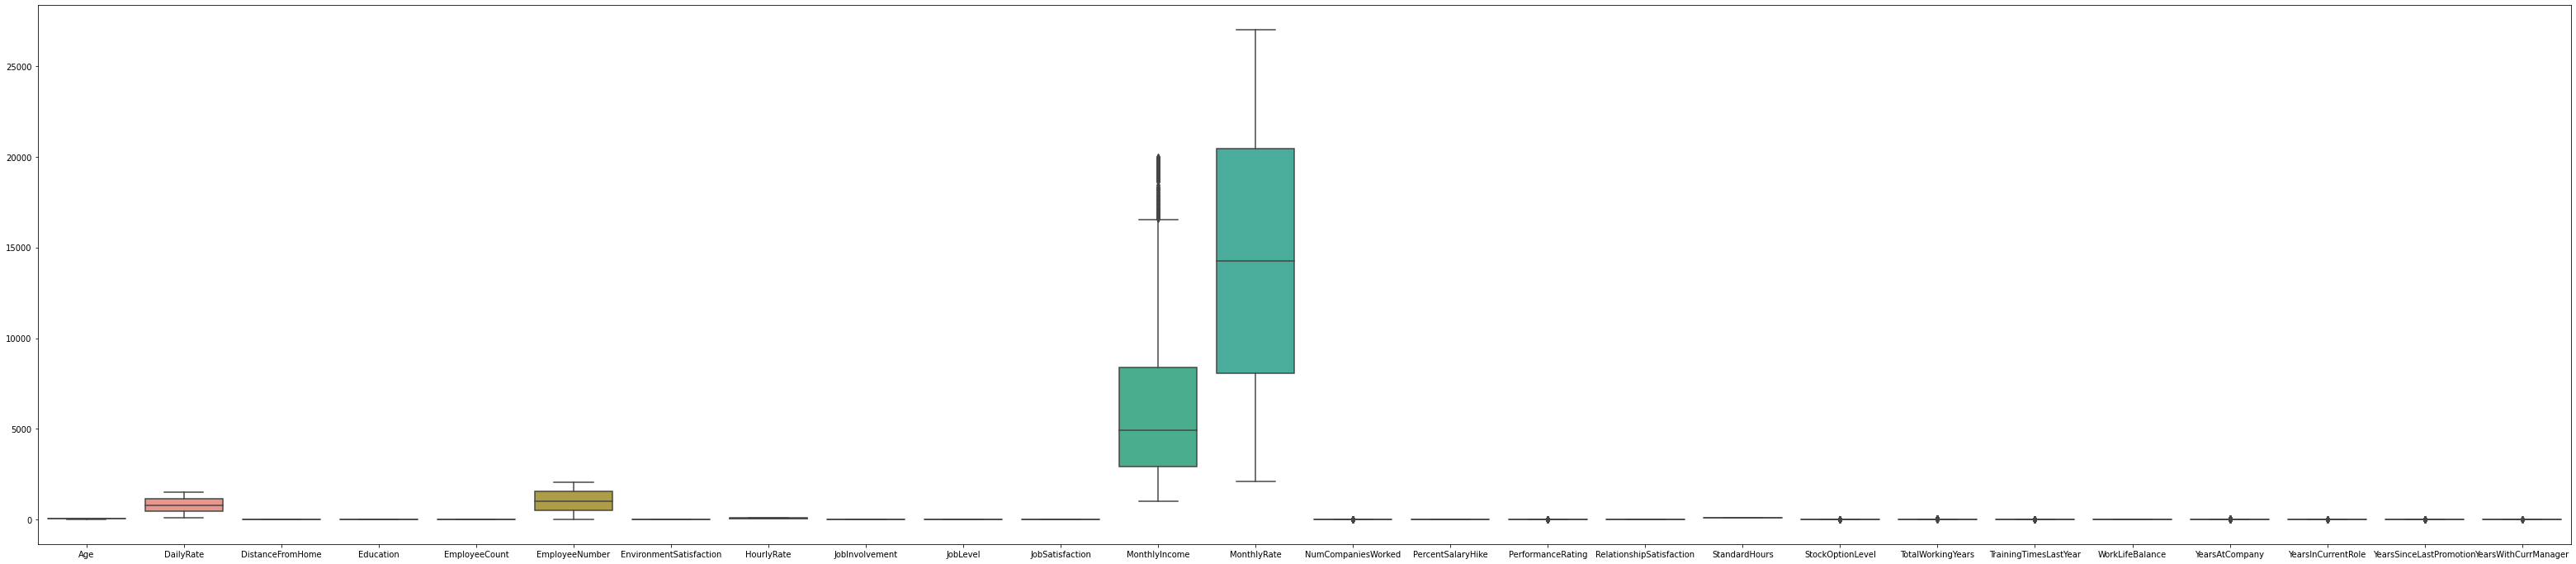

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(55, 12))
sns.boxplot(data = data, ax=ax)
plt.show()

The are large number of outliers in MonthlyIncome feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47b451b9d0>,
      dtype=object)

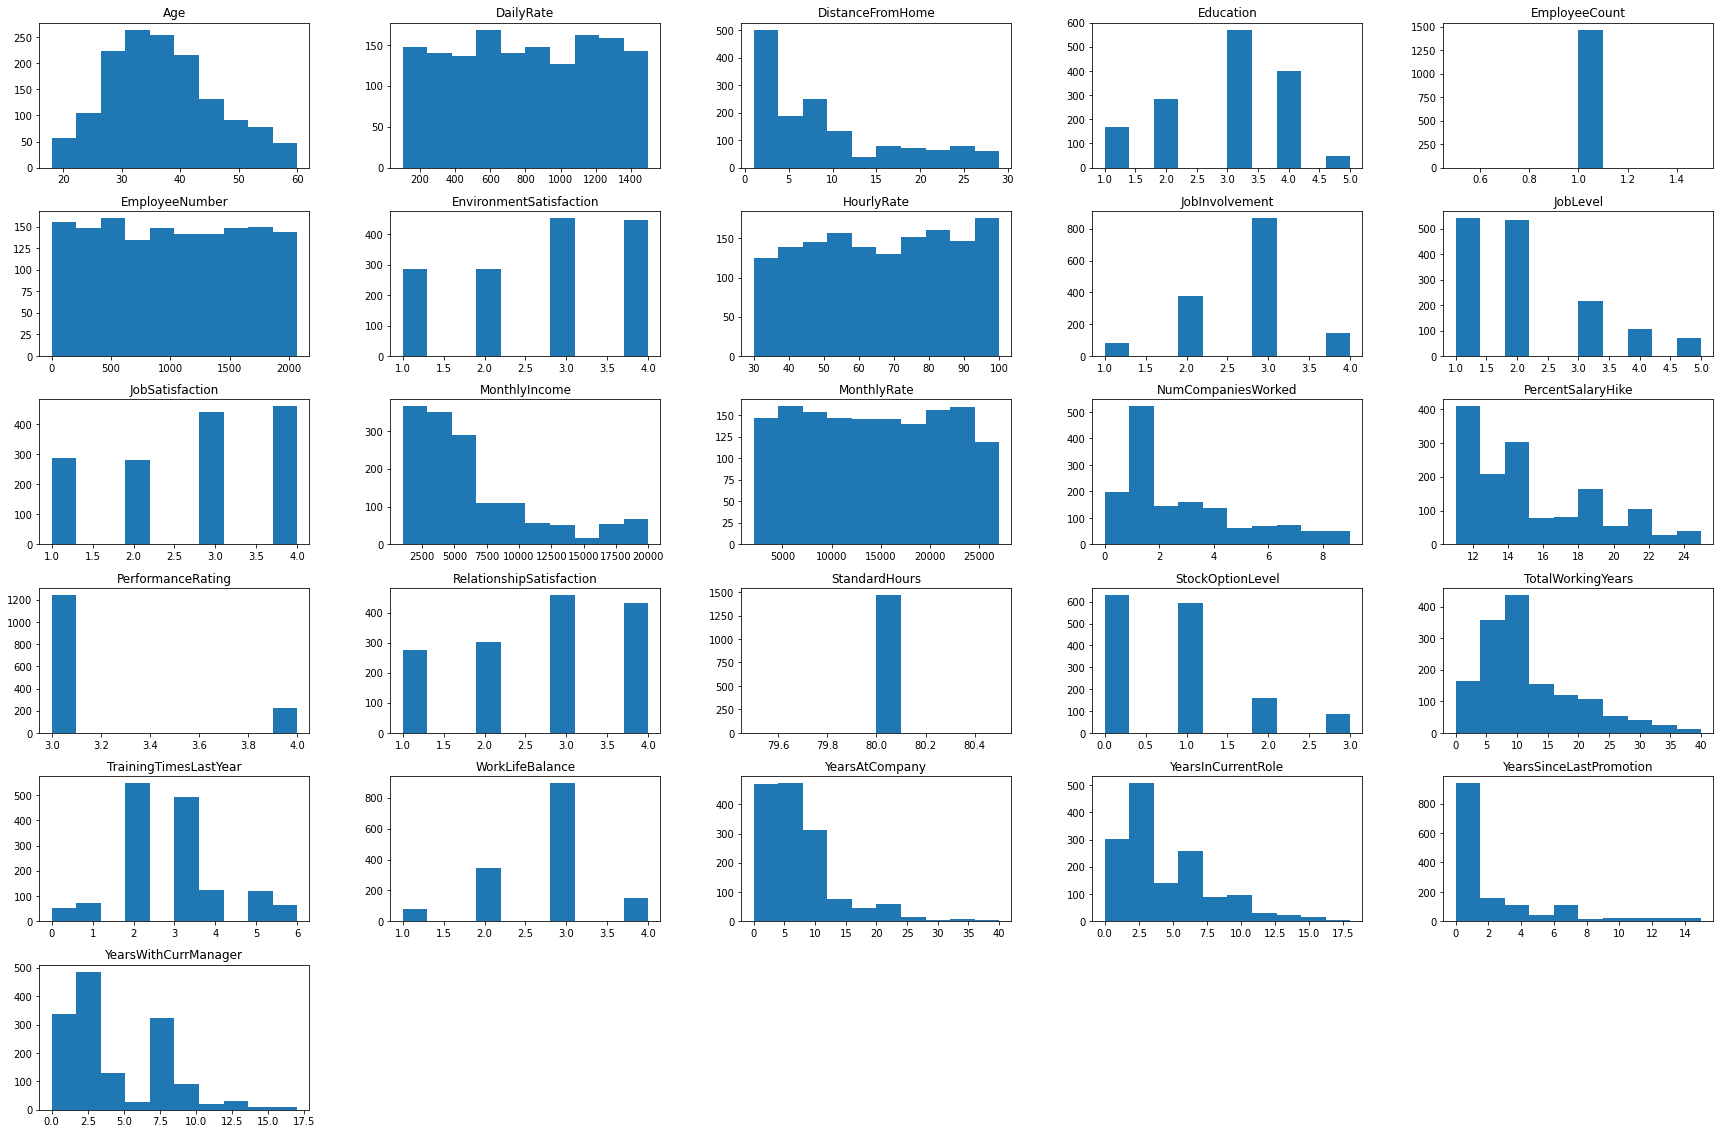

In [105]:
 data.hist(figsize = (30,20), grid = False)

There is skewed data in HourlyRate, MonthlyIncome,JobInvolvement, PercentSalaryHike, TotalWorkingHours, PerformanceRating,TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion,	YearsWithCurrManager.

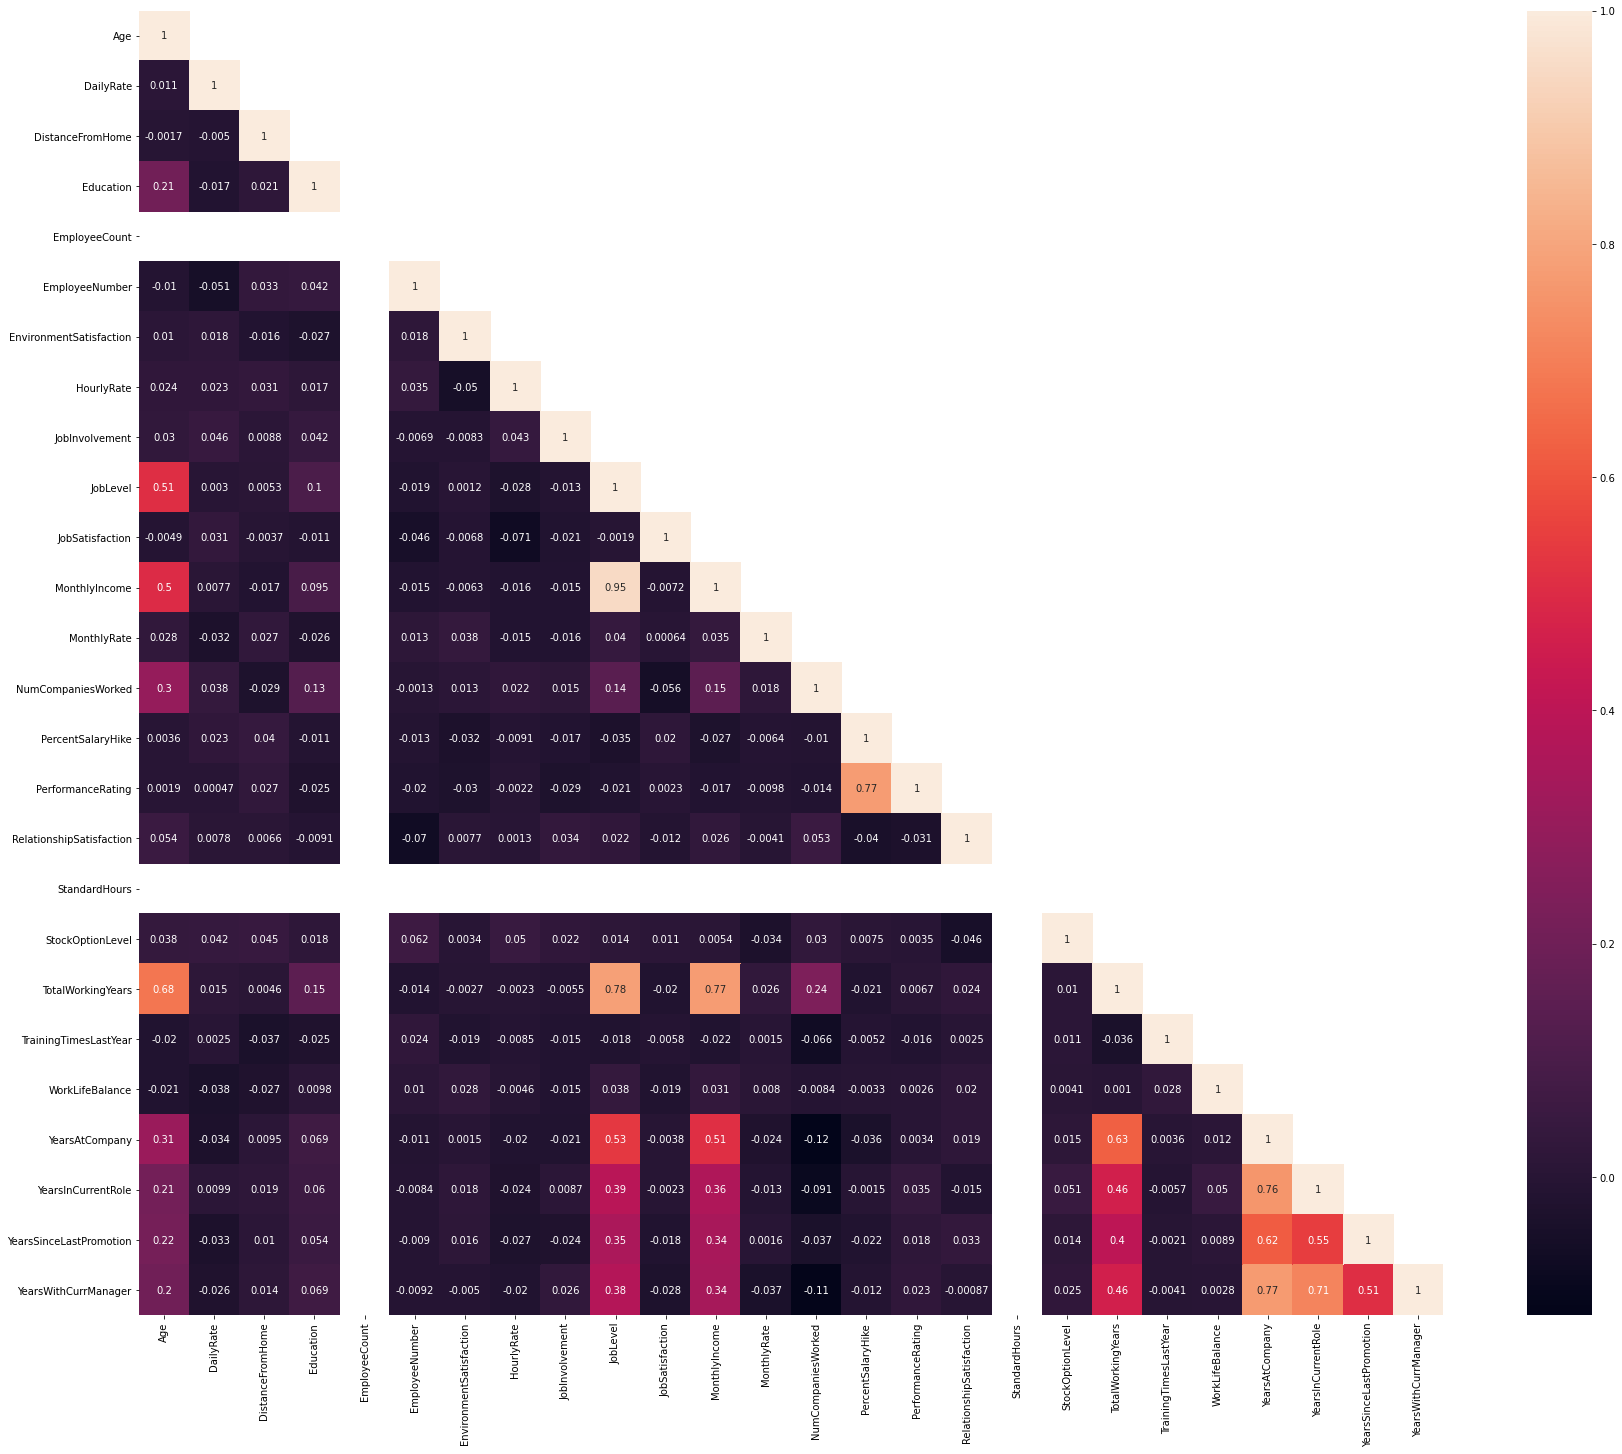

In [106]:
#Correlation Matrix

corr_mat = data.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

There seems to have correlation between:
 

1.   TotalWorkingYears and Age
2.   TotalWorkingYears and JobLevel
3.   TotalWorkingYears and MonthlyIncome
4.   TotalWorkingYears and YearsAtCompany 
5.   YearsAtCompany and YearsInCurrentRole
6.   YearsInCurrentRole and YearsWithCurrManager



In [107]:
Attrition  = data.groupby('Attrition')
A = Attrition.mean()
A

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


There is a single value for EmployeeCount, StandardHours, Over18. There are few features that show very different values between those who leave the company and those who do not. We will use these features to predict the attrition

In [108]:
data['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

There is only one value in StandardHours, so it will not help in determing the attrition rate

In [109]:
data['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

There is only one value in EmployeeCount, so it will not help in determing the attrition rate



In [110]:
data['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

There is only one value in Over18, so it will not help in determing the attrition rate

In [111]:
data1 = data.drop(columns = ['StandardHours', 'EmployeeCount', 'Over18'])

We have dropped these variables as these are not determing the attrition rate.

In [112]:
le = LabelEncoder()
data1['Attrition']=le.fit_transform(data1['Attrition'])
data1['BusinessTravel']=le.fit_transform(data1['BusinessTravel'])
data1['Department']=le.fit_transform(data1['Department'])
data1['EducationField']=le.fit_transform(data1['EducationField'])
data1['Gender']=le.fit_transform(data1['Gender'])
data1['JobRole']=le.fit_transform(data1['JobRole'])
data1['MaritalStatus']=le.fit_transform(data1['MaritalStatus'])
data1['OverTime']=le.fit_transform(data1['OverTime'])

Applied label encoder in order to convert the categorical data into the numerical data.

In [113]:
data1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


Reaading the data

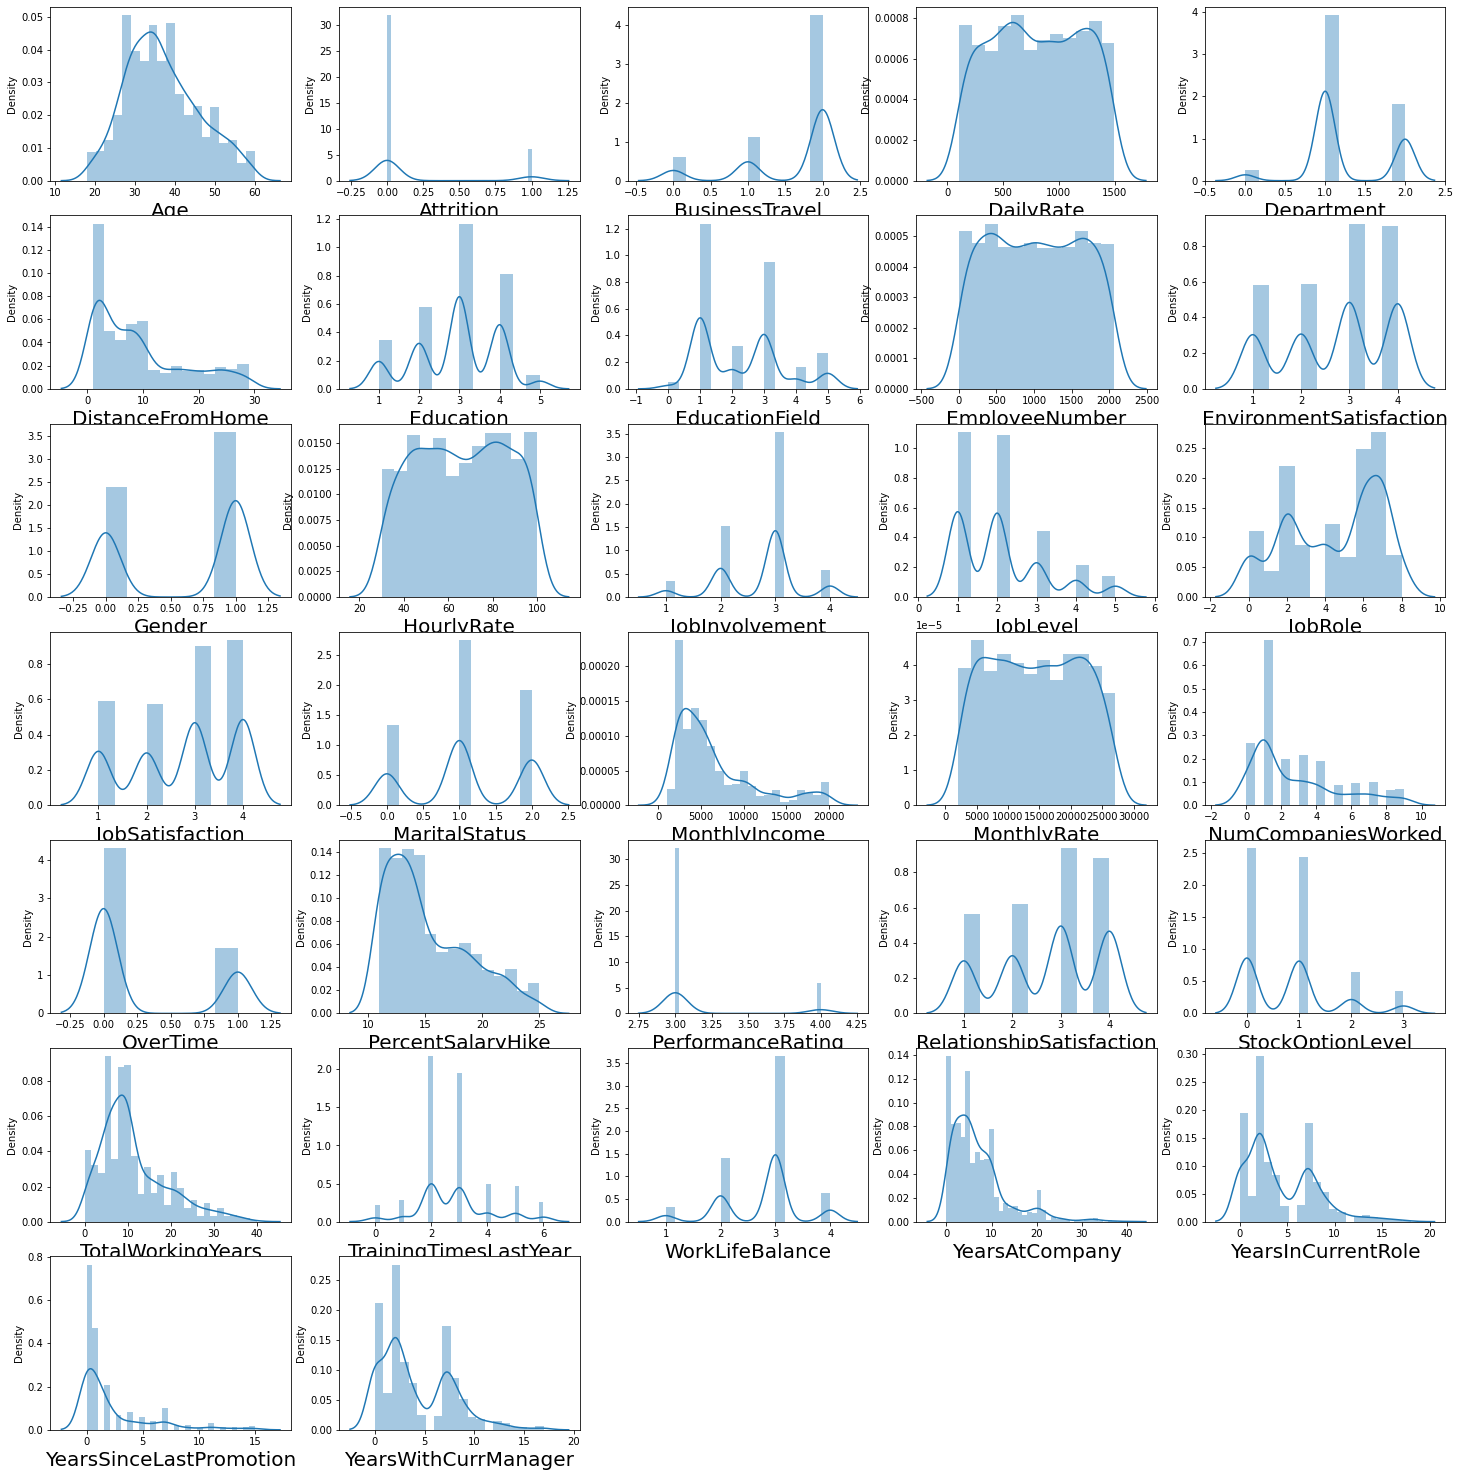

In [114]:
plt.figure(figsize = (25,30))
graph = 1

for column in data1:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.distplot(data1[column])
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

There is presence of skewness in the dataset

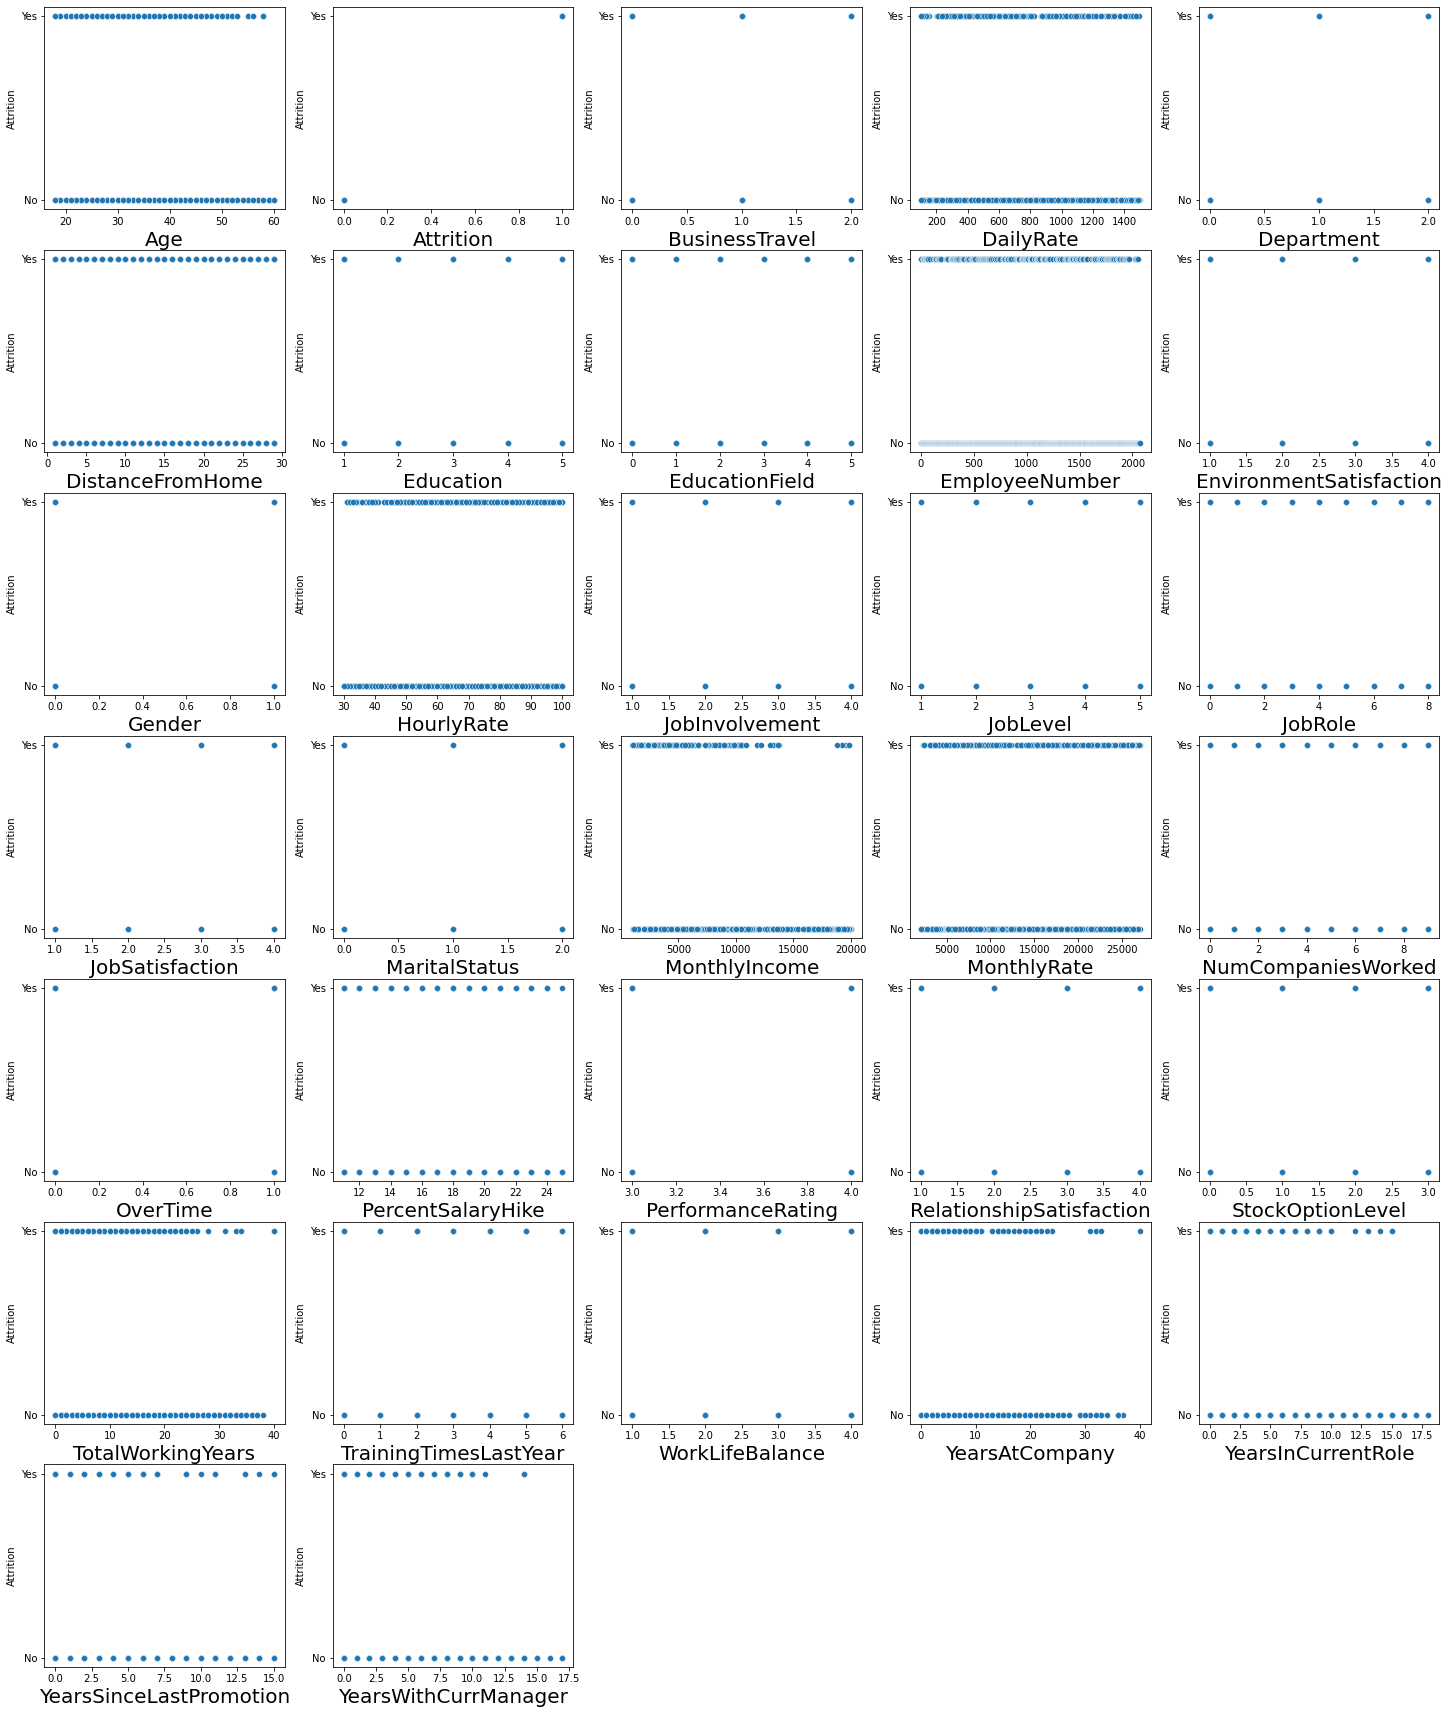

In [115]:
plt.figure(figsize = (25,35))
graph = 1

for column in data1:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = data1[column], y = 'Attrition', data = data)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

* Those with greater than 11 years with current manager are less likely to leave than those with less than 11 years. 

* Those who got promotion since last year are less likelt to leave as compared to those who have not.

* Those with greater than 10 years in current role are less likely to leave than those with less than 10 years.
 
* Those with greater than 25 years with company are less likely to leave than those with less than 25 years.

* Those with greater than 25 years total working years are less likely to leave than those with less than 25 years.

* Those with greater than 1 lac monthly income are less likely to leave than those with less than 1 lac monthly income.

* Those with age greater than 50 are less likely to leave than those with age less than 50.



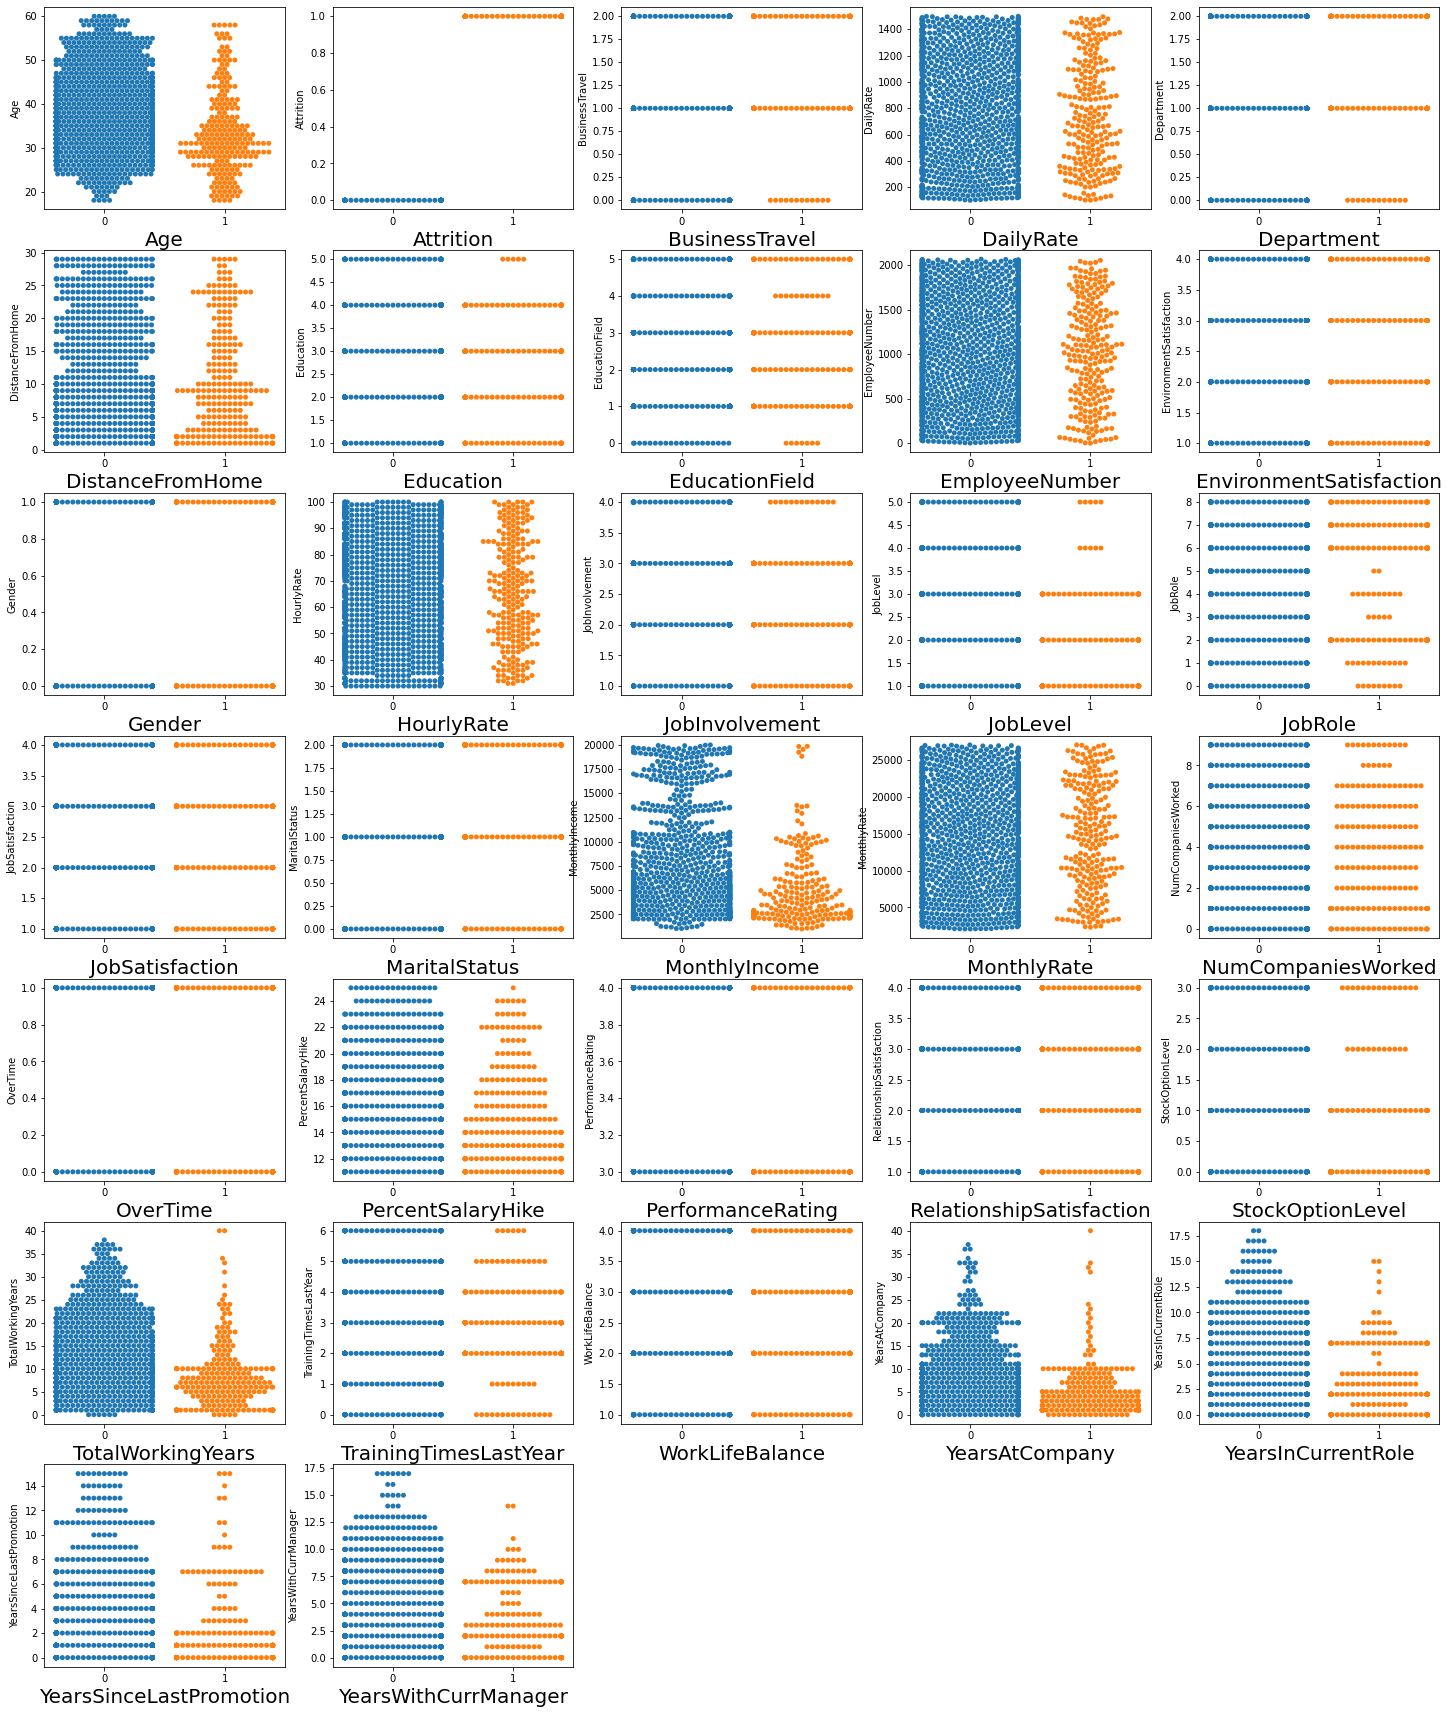

In [116]:
plt.figure(figsize = (25,35))
graph = 1

for column in data1:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.swarmplot(x = data1['Attrition'] , y = data1[column], data = data1)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

It shows certain pattern between those who leave the job and those who do not.

In [135]:
Y = df['Attrition']
X = df.drop(columns = ['Attrition'])

Spliting the data into dependent and independent variables.

In [136]:
#Handling class imbalance problem by oversampling the minority classes.

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_over, Y_over = SM.fit_resample(X,Y)

Applied oversampling

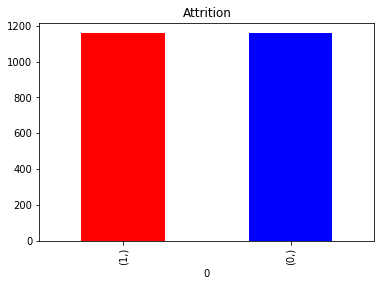

In [137]:
pd.DataFrame(Y_over).value_counts().plot(kind='bar', title='Attrition', color=['r','b'])

Solved the problem of class imbalance

In [138]:
xdata = pd.DataFrame(X_over)
xdata.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


Converting x data into dataframe

In [139]:
x = xdata.rename(columns = {0:'Age',1: 'BusinessTravel', 2:'DailyRate', 3:'Department', 4:'DistanceFromHome',
       5:'Education', 6:'EducationField', 7:'EmployeeNumber',
      8: 'EnvironmentSatisfaction', 9:'Gender', 10:'HourlyRate',11: 'JobInvolvement',
      12: 'JobLevel', 13:'JobRole',14: 'JobSatisfaction',15: 'MaritalStatus',
      16: 'MonthlyIncome', 17:'MonthlyRate',18: 'NumCompaniesWorked', 19:'OverTime',
       20:'PercentSalaryHike', 21:'PerformanceRating', 22:'RelationshipSatisfaction',
       23:'StockOptionLevel', 24:'TotalWorkingYears', 25:'TrainingTimesLastYear',
       26:'WorkLifeBalance', 27:'YearsAtCompany', 28:'YearsInCurrentRole',
      29: 'YearsSinceLastPromotion', 30:'YearsWithCurrManager'})

x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


Renaming the features

In [140]:
y = pd.Series(Y_over)
y.head()

0    1
1    0
2    1
3    0
4    0
dtype: int64

Converting y data into series

In [148]:
#Dealing with outliers(applying IQR)

# findingout the quantile of data with continuous columns
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
df_new = x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", x.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (x.shape[0]-df_new.shape[0])/x.shape[0])

shape before and after
shape before         : (2316, 31)
shape after          : (1421, 31)
Percentage Loss      : 0.3864421416234888


We are lossing 38% data so we cannot apply this method

In [149]:
#Applying z score

z = np.abs(zscore(x))

df = x[(z<3).all(axis = 1)]

Applied z score

In [150]:
print("shape before and after")
print("shape before".ljust(20),":", x.shape)
print("shape after".ljust(20),":", df.shape)
print("Percentage Loss".ljust(20),":", (x.shape[0]-df.shape[0])/x.shape[0])

shape before and after
shape before         : (2316, 31)
shape after          : (2068, 31)
Percentage Loss      : 0.1070811744386874


Lossing only 10% data, so we can apply z score

In [151]:
#applying standard scaler:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

Applied standard scaler

In [152]:
x_scaled.shape[1]
vif = pd.DataFrame()

vif['Features'] = df.columns
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif

,Features,vif
0,Age,1.760630
1,BusinessTravel,1.038726
2,DailyRate,1.062302
3,Department,2.179216
4,DistanceFromHome,1.059321
5,Education,1.088578
6,EducationField,1.050167
7,EmployeeNumber,1.042797
8,EnvironmentSatisfaction,1.094972
9,Gender,1.067150


VIF is less than 10 for all the features, thus there is no problem of multicollinearity

In [171]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']
acc = []

for model in range(len(models)):
    clf = models[model]
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    acc.append(accuracy_score(pred, y_test))

models = {'Modelling Algorithm': model_names, 'Accuracy': acc}
models_df = pd.DataFrame(models)
models_df

,Modelling Algorithm,Accuracy
0,KNearestNeighbors,0.761658
1,RandomForestClassifier,0.913644
2,DecisionTree,0.815199
3,GradientBoostingClassifier,0.891192


Trained the model and received accuracy score

In [165]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
dtc = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

Initializing the classifiers

In [172]:
#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.7616580310880829
Precision: 0.7024128686327078
Recall: 0.9065743944636678
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.62      0.72       290
           1       0.70      0.91      0.79       289

    accuracy                           0.76       579
   macro avg       0.79      0.76      0.76       579
weighted avg       0.79      0.76      0.76       579



Got metrics with knn algorithm

In [173]:
#Train the model using the training sets
rf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.9136442141623489
Precision: 0.9283154121863799
Recall: 0.8961937716262975
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       290
           1       0.93      0.90      0.91       289

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579



Got metrics with rf algorithm

In [192]:
#Train the model using the training sets
dtc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dtc.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8186528497409327
Precision: 0.8066666666666666
Recall: 0.8373702422145328
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       290
           1       0.81      0.84      0.82       289

    accuracy                           0.82       579
   macro avg       0.82      0.82      0.82       579
weighted avg       0.82      0.82      0.82       579



Got metrics with dtc algorithm

In [191]:
#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))
#Classification report
print("Classification report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8911917098445595
Precision: 0.9064748201438849
Recall: 0.8719723183391004
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       290
           1       0.91      0.87      0.89       289

    accuracy                           0.89       579
   macro avg       0.89      0.89      0.89       579
weighted avg       0.89      0.89      0.89       579



Got metrics with gb algorithm

In [179]:
#Now, let's apply cross validation 

from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)
models = [KNeighborsClassifier(), RandomForestClassifier(),
          DecisionTreeClassifier(), GradientBoostingClassifier()]
model_names = ['KNearestNeighbors', 'RandomForestClassifier', 'DecisionTree',
               'GradientBoostingClassifier']


k_f = KFold(n_splits = 4, shuffle = True)
k_f

CV_S = []

for model in range(len(models)):
    clf = models[model]
    c = clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    CV_S.append(cross_val_score(c, x, y, cv = 5).mean())
    

CV = {'Modelling Algorithm': model_names, 'CV SCORE': CV_S}
CV_df = pd.DataFrame(CV)
CV_df

,Modelling Algorithm,CV SCORE
0,KNearestNeighbors,0.727555
1,RandomForestClassifier,0.827765
2,DecisionTree,0.686091
3,GradientBoostingClassifier,0.648140


Applied Cross Validation

In [180]:
#Comparing CV Score and the Accuracy score:

Comparison = pd.DataFrame({})
Comparison['Modelling Algorithm'] =  model_names
Comparison['ACCURACY'] = acc
Comparison['CV SCORE'] = CV_S
Comparison['Difference'] = [acc[0] - CV_S[0], acc[1] - CV_S[1], acc[2] - CV_S[2], acc[3] - CV_S[3]]
Comparison

,Modelling Algorithm,ACCURACY,CV SCORE,Difference
0,KNearestNeighbors,0.761658,0.727555,0.034103
1,RandomForestClassifier,0.913644,0.827765,0.085879
2,DecisionTree,0.815199,0.686091,0.129107
3,GradientBoostingClassifier,0.891192,0.648140,0.243052


The difference between the accuracy score and the CV score is minimum for the KNearestNeighbors

In [181]:
#HYPERPARAMETER TUNING:

grid_param = {
    'n_neighbors' : range(2,8,2),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' : range(20,40,5)
}

Applied hyperparameter tuning

In [182]:
grid = GridSearchCV(knn, param_grid = grid_param)

Applied gridsearch CV

In [183]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': range(20, 40, 5),
                         'n_neighbors': range(2, 8, 2),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [184]:
best_parameters = grid.best_params_
print(best_parameters)

{'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 2, 'weights': 'distance'}


Got the best parameters

In [190]:
#FINAL MODEL
#Substituting the best parameters in the KNeighborsClassifier:

KNN = KNeighborsClassifier(algorithm = 'auto', leaf_size = 20, n_neighbors = 2, weights = 'distance')

KNN.fit(X_train, y_train)
KNN.score(X_test,y_test)

0.8169257340241797

Increased the score to 81% using hyperparameter tuning

In [188]:
#SAVING THE MODEL:

import joblib
joblib.dump(KNN, 'HR_Analytics_final_model.pkl')

['HR_Analytics_final_model.pkl']

Saved the model